# Valor optimo de k 

Se plantearan dos aproximaciones para elegir el valor optimo de k



In [98]:
from sklearn.datasets import make_blobs
from scipy.spatial import distance
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt 

In [109]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)

In [110]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
#print(kmeans.cluster_centers_, kmeans.labels_)

In [111]:
import matplotlib.colors as mcolors
colors = list(mcolors.TABLEAU_COLORS)
for i in range(len(colors)):
    colors[i] = colors[i].split(":")[-1]

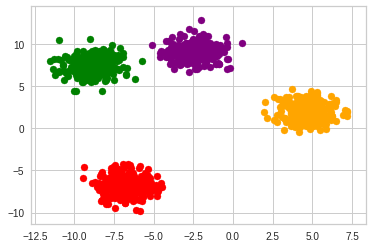

In [112]:
for point, label in zip(X, kmeans.labels_):
    plt.scatter(point[0], point[1], c = colors[(label+1) % len(colors)])
plt.show()

## Aproximación 1: Elbow Method

Se suma el cuadrado de la distancia entre el punto i y su centroide (Para todos los puntos del cluster)

Se ve el k óptimo cuando la curva pasa de ser muy pronunciada a ser más plana 

$ distorsion = \sum_{i \in Clusters} \sum_{p \in C_i} distance(p, centroid_i)^2 $

In [103]:
n_features = 6
X, y = make_blobs(n_samples=1000, n_features=n_features, centers=3, random_state=42)
values_k = []
values_distances = []
for n_clusters in range (1, 10):
    values_k.append(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    square_distance = 0
    for (point, tag) in zip(X, labels):
        square_distance += distance.euclidean(point, centroids[tag])
    values_distances.append(square_distance)

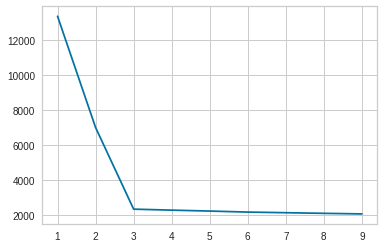

In [104]:
plt.plot(values_k, values_distances)

## Aproximación 2: Silhouette Method 

Este método mide la similaridad de un punto con los otros puntos de su centroide a(i) comparado con la similaridad del mismo punto con los otros puntos de otros centroides b(i)

Cuando dos puntos son iguales, su similaridad sera de 1, el valor de similaridad oscila entre -1 y 1

$ s = \sum_{i \in x} s(i) $

$ s(i) = \frac{b(i) - a(i)}{ max\{ a(i), b(i) \}} $

$ a(i) = 0$ if $|{C_i}| = 1 $

$ a(i) = \frac{1}{|C_i| - 1} \sum_{j \in C_i, j \neq i} distance(i, j) $

$ b(i) = min ( \frac{1}{|C_j|} \sum_{j \in C_j} distance(i, j) $


In [105]:
def createClusters(x, y, n_clusters):
    clusters = []
    [clusters.append([]) for i in range(n_clusters)]
    for p, t in zip(x, y):
        clusters[t].append(t)
    return clusters 

2 clusters
3 clusters
4 clusters
5 clusters
6 clusters
7 clusters
8 clusters
9 clusters
10 clusters
11 clusters


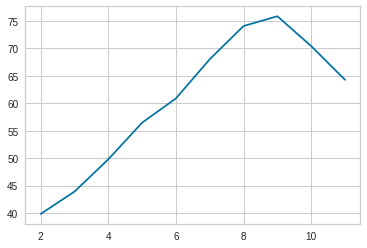

In [114]:
n_features = 6
X, y = make_blobs(n_samples=100, n_features=n_features, centers=9, random_state=42)
values_k = []
values_similarities = []
for n_clusters in range (2, 12):
    print(f"{n_clusters} clusters")
    values_k.append(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    clusters = createClusters(X, labels, n_clusters)
    similarity = 0
    for i in range(len(X)):
        distance_other_clusters = np.zeros((n_clusters))
        a_i = 0
        b_i = 0
        for j in range(len((X))):
            if i != j:
                if labels[i] == labels[j]:
                    a_i += distance.euclidean(X[i], X[j])
                else:
                    distance_other_clusters[labels[j]] += distance.euclidean(X[i], X[j])
        a_i = a_i / (len(clusters[labels[i]]) - 1)
        for k in range(n_clusters):
            distance_other_clusters[k] = distance_other_clusters[k] / len(clusters[k])
        distance_other_clusters = np.delete(distance_other_clusters, labels[i])
        b_i = np.min(distance_other_clusters)
        similarity += ((b_i - a_i) / np.max([b_i, a_i]))
    values_similarities.append(similarity)

plt.plot(values_k, values_similarities)
            